In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import time

In [7]:
# ================= STORAGE LISTS =================
brand, model = [], []
ratings, price = [], []
capacity, wm_type, load_type = [], [], []
warranty = []

# ================= HEADERS =================
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/144.0.0.0 Safari/537.36"
}

# ================= SCRAPING =================
for page in range(1, 42):

    url = f"https://www.flipkart.com/search?q=washing+machine&page={page}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to fetch page:", page)
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    products = soup.find_all("div", {"data-id": True})

    for prod in products:

        title_tag = prod.find("div", class_="RG5Slk")
        if not title_tag:
            continue

        full_title = title_tag.text.strip()
        title_lower = full_title.lower()

        # ================= BRAND =================
        brand_name = full_title.split()[0]
        brand.append(brand_name)

        # ================= MODEL CLEANING =================
        clean = full_title

        # Remove Brand
        clean = re.sub(rf"^{brand_name}\s*", "", clean, flags=re.I)

        # Remove Capacity
        clean = re.sub(r"\b\d+(\.\d+)?\s*kg\b", "", clean, flags=re.I)

        # Remove Star Rating
        clean = re.sub(r"\b\d+\s*star[s]?\b", "", clean, flags=re.I)
        clean = re.sub(r"\bstar rating\b", "", clean, flags=re.I)

        # Remove Machine Type & Load Type
        clean = re.sub(r"fully automatic|semi automatic", "", clean, flags=re.I)
        clean = re.sub(r"top load|front load", "", clean, flags=re.I)

        # Remove generic words
        clean = re.sub(r"washing machine", "", clean, flags=re.I)

        # Remove Colors
        clean = re.sub(r"black|grey|gray|white|blue|red|silver|brown", "", clean, flags=re.I)

        # Remove commas
        clean = clean.replace(",", " ")

        # Remove extra spaces
        clean = re.sub(r"\s+", " ", clean).strip()

        model.append(clean if clean else "NA")

        # ================= RATING =================
        rating_tag = prod.find("div", class_="MKiFS6")
        if rating_tag:
            try:
                ratings.append(float(rating_tag.text.strip()))
            except:
                ratings.append(None)
        else:
            ratings.append(None)

        # ================= PRICE =================
        product_text = prod.get_text()
        price_match = re.search(r"₹\s?([\d,]+)", product_text)

        if price_match:
            price.append(int(price_match.group(1).replace(",", "")))
        else:
            price.append(None)

        # ================= CAPACITY =================
        cap_match = re.search(r"(\d+(\.\d+)?)\s*kg", title_lower)
        capacity.append(float(cap_match.group(1)) if cap_match else None)

        # ================= MACHINE TYPE =================
        if "fully automatic" in title_lower:
            wm_type.append("Fully Automatic")
        elif "semi automatic" in title_lower:
            wm_type.append("Semi Automatic")
        else:
            wm_type.append(None)

        # ================= LOAD TYPE =================
        if "top load" in title_lower:
            load_type.append("Top Load")
        elif "front load" in title_lower:
            load_type.append("Front Load")
        else:
            load_type.append(None)

        # ================= WARRANTY =================
        war = None
        specs = prod.find_all("li")

        for s in specs:
            text = s.text.lower()
            if "warranty" in text:
                war_match = re.search(r"(\d+)\s*year", text)
                if war_match:
                    war = int(war_match.group(1))
                    break

        warranty.append(war)

    print(f"✅ Page {page} scraped successfully")
    time.sleep(1)




print("\n🎉 Scraping + Cleaning Completed Successfully!")



✅ Page 1 scraped successfully
✅ Page 2 scraped successfully
✅ Page 3 scraped successfully
✅ Page 4 scraped successfully
✅ Page 5 scraped successfully
✅ Page 6 scraped successfully
✅ Page 7 scraped successfully
✅ Page 8 scraped successfully
✅ Page 9 scraped successfully
✅ Page 10 scraped successfully
✅ Page 11 scraped successfully
✅ Page 12 scraped successfully
✅ Page 13 scraped successfully
✅ Page 14 scraped successfully
✅ Page 15 scraped successfully
✅ Page 16 scraped successfully
✅ Page 17 scraped successfully
✅ Page 18 scraped successfully
✅ Page 19 scraped successfully
✅ Page 20 scraped successfully
✅ Page 21 scraped successfully
✅ Page 22 scraped successfully
✅ Page 23 scraped successfully
✅ Page 24 scraped successfully
✅ Page 25 scraped successfully
✅ Page 26 scraped successfully
✅ Page 27 scraped successfully
✅ Page 28 scraped successfully
✅ Page 29 scraped successfully
✅ Page 30 scraped successfully
✅ Page 31 scraped successfully
✅ Page 32 scraped successfully
✅ Page 33 scraped

In [8]:
# ================= CREATE DATAFRAME =================
df = pd.DataFrame({
    "Brand": brand,
    "Model": model,
    "Price": price,
    "Ratings": ratings,
    "Capacity(kg)": capacity,
    "Machine Type": wm_type,
    "Load Type": load_type,
    "Warranty(Years)": warranty
})

In [14]:
df

,Brand,Model,Price,Ratings,Capacity(kg),Machine Type,Load Type,Warranty(Years)
0,MarQ,by Flipkart Rating Innowash Range Maro...,6990,4.3,6.0,Semi Automatic,Top Load,2.0
1,MOTOROLA,rating Midnight Series,10490,4.3,10.0,Semi Automatic,Top Load,2.0
2,realme,TechLife rating,7990,4.2,7.0,Semi Automatic,Top Load,2.0
3,VW,NaN,6899,4.4,7.5,Semi Automatic,Top Load,NaN
4,realme,TechLife,10490,4.2,10.0,Semi Automatic,Top Load,2.0
...,...,...,...,...,...,...,...,...
979,BLACK+DECKER,+DECKER with In-built Heater,27999,NaN,8.0,Fully Automatic,Top Load,2.0
980,Whirlpool,Magic Clean,14990,4.1,7.0,Fully Automatic,Top Load,2.0
981,realme,TechLife Star Air Dry Soft Closing Lid,12290,4.2,7.5,Fully Automatic,Top Load,NaN
982,Whirlpool,with In-built Heater,39899,NaN,6.5,Fully Automatic,Front Load,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            984 non-null    object 
 1   Model            832 non-null    object 
 2   Price            984 non-null    int64  
 3   Ratings          878 non-null    float64
 4   Capacity(kg)     983 non-null    float64
 5   Machine Type     855 non-null    object 
 6   Load Type        833 non-null    object 
 7   Warranty(Years)  847 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 61.6+ KB


In [6]:
df.to_csv("washing_machines_final.csv", index=False)
print("\nCSV saved successfully ✅")


CSV saved successfully ✅


## Data_Cleaning

In [7]:
df = pd.read_csv('washing_machine_dataset.csv')
df.shape 

FileNotFoundError: [Errno 2] No such file or directory: 'washing_machine_dataset.csv'

**Insights from df.shape:**

- Returns a tuple (rows, columns).

- First value → Total number of rows (records) in the dataset.

- Second value → Total number of columns (features/variables) in the dataset.

- Helps quickly understand the size of the dataset.

####  **df.info()** 
- It gives the summary of the data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            984 non-null    object 
 1   Model            832 non-null    object 
 2   Price            984 non-null    int64  
 3   Ratings          878 non-null    float64
 4   Capacity(kg)     983 non-null    float64
 5   Machine Type     855 non-null    object 
 6   Load Type        833 non-null    object 
 7   Warranty(Years)  847 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 61.6+ KB


#### Insights 

- It shows the total number of rows (entries) in the dataset.

- It shows the total number of columns (features).

- It displays the name of each column.

- It shows the data type of every column (int, float, object, etc.).

- It shows the number of non-null values in each column, helping to identify missing data.

- It provides the memory usage of the dataset.

In [6]:
df.isnull().sum()

Brand                0
Model              152
Price                0
Ratings            106
Capacity(kg)         1
Machine Type       129
Load Type          151
Warranty(Years)    137
dtype: int64

**Insights**
- Each column in the DataFrame is listed.
- The value next to each column is the number of missing entries in that column.

In [9]:
df.dropna(inplace=True)

**Insights**
- **dropna()** -> Removes all rows that have missing values.
- **inplace = True** -> changes the dataframe Immediately.

In [11]:
df.isnull().sum()

Brand              0
Model              0
Price              0
Ratings            0
Capacity(kg)       0
Machine Type       0
Load Type          0
Warranty(Years)    0
dtype: int64

In [50]:
df['Brand'].unique()

array(['MarQ', 'MOTOROLA', 'realme', 'Samsung', 'Thomson', 'Whirlpool',
       'LG', 'Voltas', 'BOSCH', 'Haier', 'Godrej', 'ONIDA', 'TCL',
       'Midea', 'IFB', 'Motorola', 'Lloyd', 'White', 'Panasonic', 'BPL',
       'Acer', 'Intex', 'Power', 'Siemens', 'Kelvinator', 'BLACK+DECKER',
       'Admiral', 'TOSHIBA'], dtype=object)

**Insights**
- It shows all the different washing machine brands in the data, helping us see how many brands there are and if any values are missing or inconsistent

In [61]:
df.columns

Index(['Brand', 'Model', 'Price', 'Ratings', 'Capacity', 'Machine_Type',
       'Load_Type', 'Warranty(Years)'],
      dtype='object')

**Insights**
- It shows all the coliumn names in the dataframe.

In [21]:
df.rename(columns={
    "Capacity(kg)": "Capacity",
    "Machine Type": "Machine_Type",
    "Load Type":"Load_Type"
}, inplace=True)
df.columns

Index(['Brand', 'Model', 'Price', 'Ratings', 'Capacity', 'Machine_Type',
       'Load_Type', 'Warranty(Years)'],
      dtype='object')

**Insights**
- Renaming columns makes the data clearer and easier to understand.

In [64]:
df1 = df[df['Brand'] == "realme"]
df1

,Brand,Model,Price,Ratings,Capacity,Machine_Type,Load_Type,Warranty(Years)
2,realme,TechLife rating,7990,4.2,7.0,Semi Automatic,Top Load,2.0
4,realme,TechLife,10490,4.2,10.0,Semi Automatic,Top Load,2.0
7,realme,TechLife Rating,8390,4.2,7.5,Semi Automatic,Top Load,2.0
10,realme,TechLife Rating Fabric Safe Wash,12290,4.1,7.5,Fully Automatic,Top Load,2.0
21,realme,TechLife rating,10290,4.2,8.5,Semi Automatic,Top Load,2.0
...,...,...,...,...,...,...,...,...
941,realme,TechLife Rating,8390,4.2,7.5,Semi Automatic,Top Load,2.0
946,realme,TechLife Rating Fabric Safe Wash,12290,4.1,7.5,Fully Automatic,Top Load,2.0
966,realme,TechLife rating,7990,4.2,7.0,Semi Automatic,Top Load,2.0
967,realme,TechLife Rating,8390,4.2,7.5,Semi Automatic,Top Load,2.0


**Insights**
-  The DataFrame now contains only data for Realme washing machines, excluding all other brands.

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'].astype(float))

In [ ]:
Rating_above_4 = df[ (df['Rating'] >= 4) & (df['Brand'] == 'LG')]
Rating_above_4

In [ ]:
df['Price'] = pd.to_numeric(df['Price'].astype(int))


### Non-Visualization
Non-Visualization means analyzing and understanding data without using charts, graphs, or images.
Instead of visual tools, we use:

📊 Tables

🔢 Numbers

📄 Text summaries

📈 Statistical values

It is also called **Textual / Numerical Data Analysis.**

In [12]:
df.describe()

,Price,Ratings,Capacity(kg),Warranty(Years)
count,521.000000,521.000000,521.000000,521.000000
mean,14321.213052,4.200576,7.762380,2.103647
std,8416.760332,0.201102,1.526889,0.582440
min,6790.000000,2.700000,6.000000,1.000000
25%,8390.000000,4.100000,7.000000,2.000000
50%,12290.000000,4.200000,7.500000,2.000000
75%,14990.000000,4.300000,8.000000,2.000000
max,52090.000000,5.000000,14.000000,5.000000


In [26]:
print(df['Price'].mean())
print(df['Price'].max())
print(df['Price'].min())
print(df.sort_values(by='Ratings', ascending=False).head(1)[['Brand', 'Price', 'Capacity(kg)']])
print(df.sort_values(by='Price', ascending=False).head(1)[['Brand', 'Price', 'Capacity(kg)']])

14321.213051823417
52090
6790
     Brand  Price  Capacity(kg)
895  Haier  25490           7.5
       Brand  Price  Capacity(kg)
679  Siemens  52090           7.5


**Insights**
- The average price shows how much most washing machines cost.
- The highest and lowest prices show the range from cheap to expensive machines.
- The top-rated machine is the one customers like the most.
- The most expensive machine is the premium one with extra features or bigger capacity.

In [29]:
print(df['Brand'].value_counts())

Brand
realme          131
MarQ             88
Whirlpool        83
MOTOROLA         48
Voltas           42
Samsung          23
IFB              16
Godrej           15
BOSCH            11
Lloyd            10
LG                9
Panasonic         7
ONIDA             6
Haier             5
White             4
Midea             4
Motorola          2
Thomson           2
Intex             2
Power             2
Siemens           2
Admiral           2
TOSHIBA           2
TCL               1
BPL               1
Acer              1
Kelvinator        1
BLACK+DECKER      1
Name: count, dtype: int64


**Insights**
- Some brands appear more often, showing they are popular in the market.
- Brands with fewer listings may be less common or new

In [32]:
print(df.groupby('Brand')['Ratings'].mean())

Brand
Acer            2.700000
Admiral         3.600000
BLACK+DECKER    3.900000
BOSCH           4.236364
BPL             4.400000
Godrej          4.080000
Haier           4.440000
IFB             4.250000
Intex           4.100000
Kelvinator      3.900000
LG              4.377778
Lloyd           4.030000
MOTOROLA        4.283333
MarQ            4.296591
Midea           4.125000
Motorola        4.050000
ONIDA           4.200000
Panasonic       4.214286
Power           4.300000
Samsung         4.186957
Siemens         4.300000
TCL             4.000000
TOSHIBA         4.150000
Thomson         4.100000
Voltas          4.216667
Whirlpool       4.157831
White           3.875000
realme          4.166412
Name: Ratings, dtype: float64


**Insights**
- Some brands have a higher average rating, showing customers are more satisfied with them.
- Brands with lower average ratings may need to improve quality or features.

In [35]:
import numpy as np              # numerical operations
import pandas as pd             # data manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns            # statistical data visualization
import plotly.express as px      # interactive visualization

### Data Visualization
Data Visualization represents the text or numerical data in a visual format, which makes it easy to grasp the information the data express. We, humans, remember the pictures more easily than readable text, so Python provides us various libraries for data visualization like matplotlib, seaborn, plotly, etc. In this tutorial, we will use Matplotlib and seaborn for performing various techniques to explore data using various plots.

Now lets us start exploring data and study different data visualization plots with different types of data. And for demonstrating some of the techniques 

1.   Scatter Plot
2.   Line Plot
3.   histogram
4.   bar plot (count plot)
5.   box plot (whisker plot)
6.   pie chart
7.   KDE plot
8.   Boxen Plot
9.   Distplot
10.  Violin Plot

### Univariate Analysis
- Univariate analysis is the simplest form of analysis where we explore a single variable.
-  Univariate analysis is performed to describe the data in a better way. -
-  we perform Univariate analysis of Numerical and categorical variables differently because plotting uses different plots.

### Numerical Data
- Analyzing Numerical data is important because understanding the distribution of variables helps to further process the data.
- Most of the time you will find much inconsistency with numerical data so do explore numerical variables.

### 1) Histogram
- A histogram is a value distribution plot of numerical columns.
- It basically creates **bins** in various ranges in values and plots it where we can visualize how values are distributed.
- We can have a look where more values lie like in positive, negative, or at the center(mean)

#### Explination
1. In a histogram, the x-axis represents intervals(bins) of data values(e.g.,0-10,10-20,20-30,etc).
2. The y-axis represents the frequency -- how data points fall in to each bin,
3. unlike a regular bar chart (where each bar can represent different categories),a histogram is used only for **continuous or numerical data.**

#### Why Use Histograms?

- To see the shape of your data (e.g., bell-shaped, skewed, uniform).
- To understand how data is distributed.
- To spot patterns, such as most common ranges or outliers.

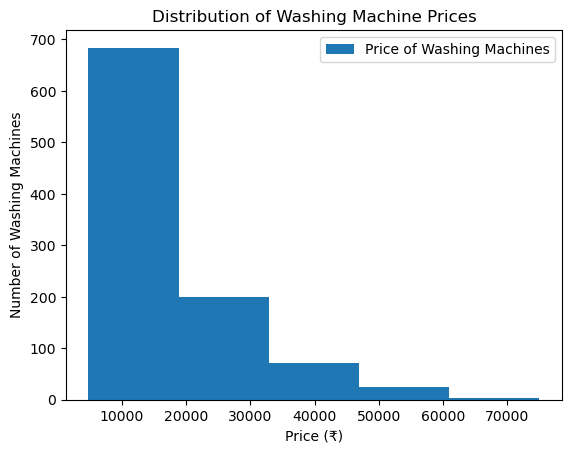

In [14]:
# Histogram using matplotlib
plt.hist(df['Price'], bins=5, label='Price of Washing Machines')

plt.title('Distribution of Washing Machine Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Washing Machines')

plt.legend()
plt.show()

**Insights**
- The washing machine prices are grouped into five price ranges (bins).

- The histogram illustrates how washing machines are distributed from the lowest to the highest price range.

- Most washing machines fall within the lower price ranges, indicating a stronger presence in the budget or affordable segment of the market.

- Fewer machines appear in the higher price bins, suggesting limited availability or lower demand in the premium segment.

- The distribution of bars across the bins helps us understand the overall price variation and spread within the dataset.

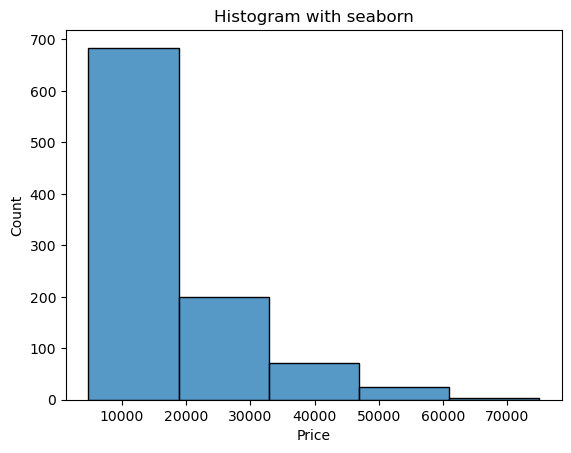

In [6]:
# Histogram Using Seaborn
sns.histplot(df['Price'],bins = 5) # it controls inside a plot
plt.title('Histogram with seaborn')
plt.show()

In [17]:
print(df['Price'].mean())
print(df['Price'].median())

17201.89024390244
13720.5


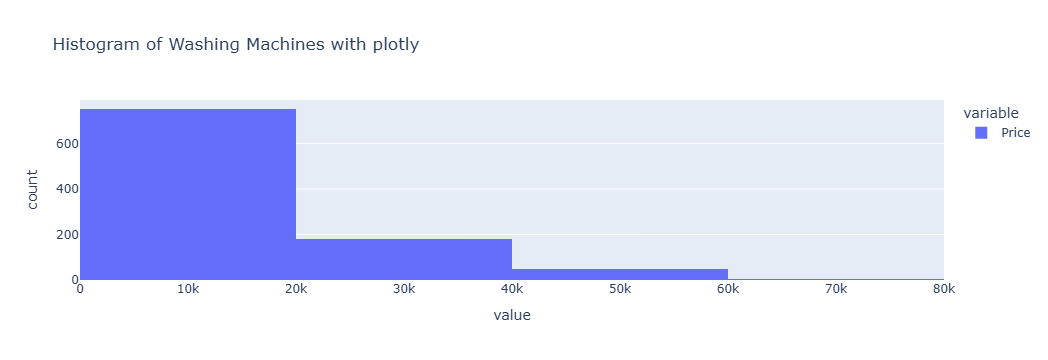

In [13]:
# Histogram using Plotly
fig = px.histogram(df['Price'], nbins = 5,title ='Histogram of Washing Machines with plotly')
fig.show()

**Insights**
- Price distribution is right-skewed.
- Most prices are low; a few high prices create a long right tail.
- Mean > Median due to high-value outliers.

###  KDE Plot:

A **KDE plot** (Kernel Density Estimate plot) is a **smooth curve** that shows the **probability density** of a continuous variable — basically, it estimates the **distribution** of your data.

**Explanation:**

- Think of a KDE plot as a **smoothed version of a histogram**.
- It shows where data points are **concentrated** (peaks) and where they are **sparse** (valleys).
- The area under the curve adds up to **1**, because it represents a **probability distribution**.

- Instead of using bars (like in a histogram), the KDE plot uses a **kernel function** (usually a Gaussian curve) to estimate how likely values are to occur in different ranges.

**Example:**

Imagine you’re plotting the heights of 100 students:

- A KDE plot would show a smooth curve where:
  - The **tallest peak** might be around 170 cm (the most common height).
  - It gradually rises and falls, giving you a sense of how spread out or concentrated the heights are.

**Why Use a KDE Plot?**

- To get a **smooth, clean view** of the data distribution.
- To **compare multiple distributions** (you can plot several KDEs on the same graph).
- To **understand the shape** of your data — like whether it's **normal**, **skewed**, or **multi-modal** (has more than one peak).

**KDE vs Histogram:**

| Feature         | Histogram                        | KDE Plot                          |
|-----------------|----------------------------------|-----------------------------------|
| Appearance      | Bars                             | Smooth curve                      |
| Interpretation  | Count/frequency                  | Probability density               |
| Smoothness      | Choppy (depends on bin size)     | Smooth (depends on bandwidth)     |
| Customizable?   | Bins                             | Kernel & bin width                |

**Bandwidth**

The **bandwidth** controls how smooth the KDE is:
- Small bandwidth = curve is more wiggly (more detail).
- Large bandwidth = smoother curve (less detail).

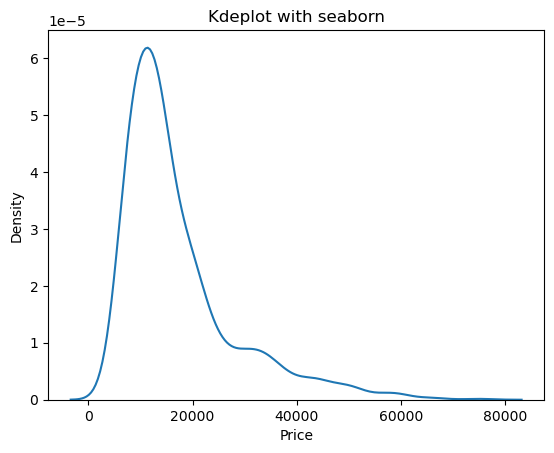

In [4]:
# Kdepolot Using Seaborn
sns.kdeplot(df['Price']) # it controls inside a plot
plt.title('Kdeplot with seaborn')
plt.show()

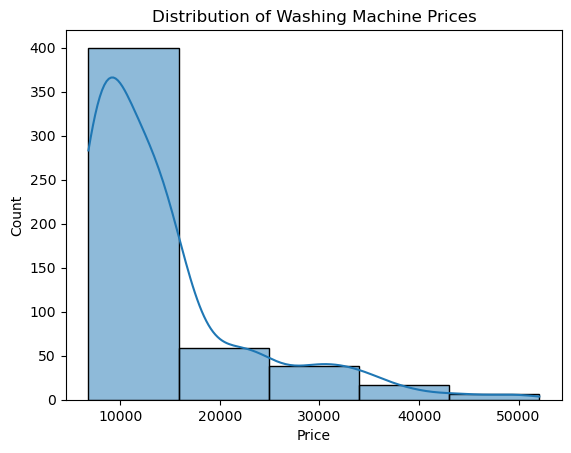

In [37]:
sns.histplot(df['Price'],bins = 5,kde = True) # it controls inside a plot
plt.title('Distribution of Washing Machine Prices')
plt.show()

**Insights**

- Here are the correct insights in bullet points (simple and clear):
- Most washing machines are priced in the lower range (around ₹8,000 – ₹15,000).
- As the price increases, the number of machines decreases.
- Very expensive machines (above ₹35,000) are very few.
- The distribution is right-skewed (more products in low price range, long tail toward high prices).
- The highest concentration of products is in the budget segment.

### Categorical Data
- A variable that has text-based information is referred to as categorical variables.
- let’s look at various plots which we can use for visualizing Categorical data.

### Pie Chart:

A **pie chart** is a circular graph used to represent **parts of a whole**. Each "slice" of the pie shows a **category’s proportion** or **percentage** of the total.

**Explanation:**

- The entire pie represents **100%** of your data.
- Each **slice** corresponds to a **category** and its size shows **how much it contributes** to the total.
- The **angle or area** of each slice is proportional to the value it represents.



**Why Use a Pie Chart?**

- To show **percentages** or **proportions** clearly.
- To highlight **which category is the biggest** (or smallest).
- To provide a **quick visual impression** of how a whole is divided.

**When *Not* to Use a Pie Chart:**

- When you have **too many categories** — it gets cluttered.
- When values are **too close together** — it's hard to compare.
- In those cases, a **bar chart** might be a better choice.

**Summary:**


| Feature           | Pie Chart                    |
|-------------------|------------------------------|
| Data Type         | Categorical                  |
| Represents        | Part-to-whole relationships  |
| Total Value       | 100%                         |
| Good for          | Showing proportions clearly  |


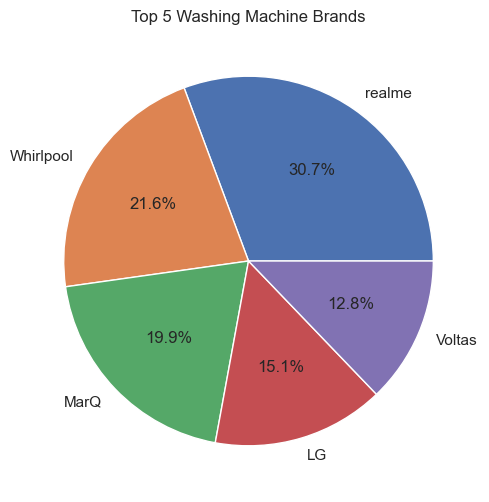

In [18]:
# pie chart using seaborn
brand_counts = df['Brand'].value_counts().head(5)

plt.figure(figsize=(6,6))

plt.pie(
    brand_counts.values,
    labels=brand_counts.index,
    autopct='%1.1f%%'
    # explode=[0,0.25,0,0,0]
)

plt.title("Top 5 Washing Machine Brands")
plt.show()

**Insights**
- Realme has the highest share (~30.67%), so it has the most washing machines in the dataset.
- Whirlpool is the second highest (~21.56%), showing strong presence.
- MarQ holds around ~19.89%, making it one of the major brands.
- LG and Voltas have smaller shares (~15.06% and ~12.83%) compared to the top three brands.
- Overall, the top 3 brands contribute to more than 70% of the total products, showing market concentration

### Bivariate Analysis
- We have study about various plots to explore single categorical and numerical data.
- Bivariate Analysis is used when we have to explore the relationship between 2 different variables and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model.
- When we analyze more than two variables together, we refer to it as Multivariate Analysis. We will explore different plots for both Bivariate and Multivariate Analysis.

### Categorical and Categorical
- If two variables are  categorical then there are various plots that we can use for Bivariate analysis.

### Count Plot:

- A **count plot** is a type of bar plot that shows the **number of occurrences (count)** of each category in a categorical variable.

- It is one of the simplest and most useful plots when you want to **see how many times each category appears** in your dataset.

**Explanation:**

- The **x-axis** (or y-axis) shows the **categories** (e.g., gender, colors, animal types).
- The **height** of the bar shows **how many data points** fall into each category.
- It’s essentially the **visual form of `value_counts()`** in pandas.

- Count plots are often used with **Seaborn** using the function `sns.countplot()`.

.**Why Use a Count Plot?**

- To **quickly understand how data is distributed** across categories.
- Super useful for **categorical variables**.
- Helps detect **imbalanced classes** (like in classification problems).
- Very handy in **exploratory data analysis (EDA)**.

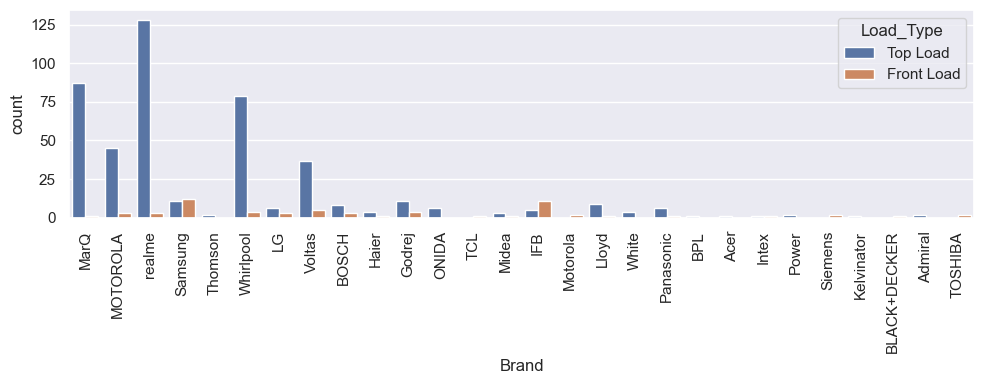

In [78]:
plt.figure(figsize=(10,4))

sns.countplot(x='Brand',
              hue='Load_Type',
              data=df,
              )

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**
- Some brands offer both Top Load and Front Load machines.
- A few brands focus mainly on one type of load.
- Certain brands have more products compared to others (higher count).
- Top Load machines appear more common than Front Load machines (if bars show higher counts).

### Numerical and Categorical
- If one variable is numerical and one is categorical then there are various plots that we can use for Bivariate analysis.

### Bar Plot

A bar plot is a chart that represents categorical data using rectangular bars. The height (or length) of each bar shows the value or frequency of the category it represents.

**Explanation:**

* In a bar plot, the x-axis typically shows categories (like colors, types of fruits, countries, etc.).

* The y-axis shows values such as counts, percentages, or any other measure related to those categories.

* The bars can be vertical or horizontal, depending on the orientation.

* The bars do not touch each other, because the categories are **distinct and not continuous.**

  
Bar plot is a simple plot which we can use to plot categorical variable on the x-axis and numerical variable on y-axis and explore the relationship between both variables. The blacktip on top of each bar shows the confidence Interval. 

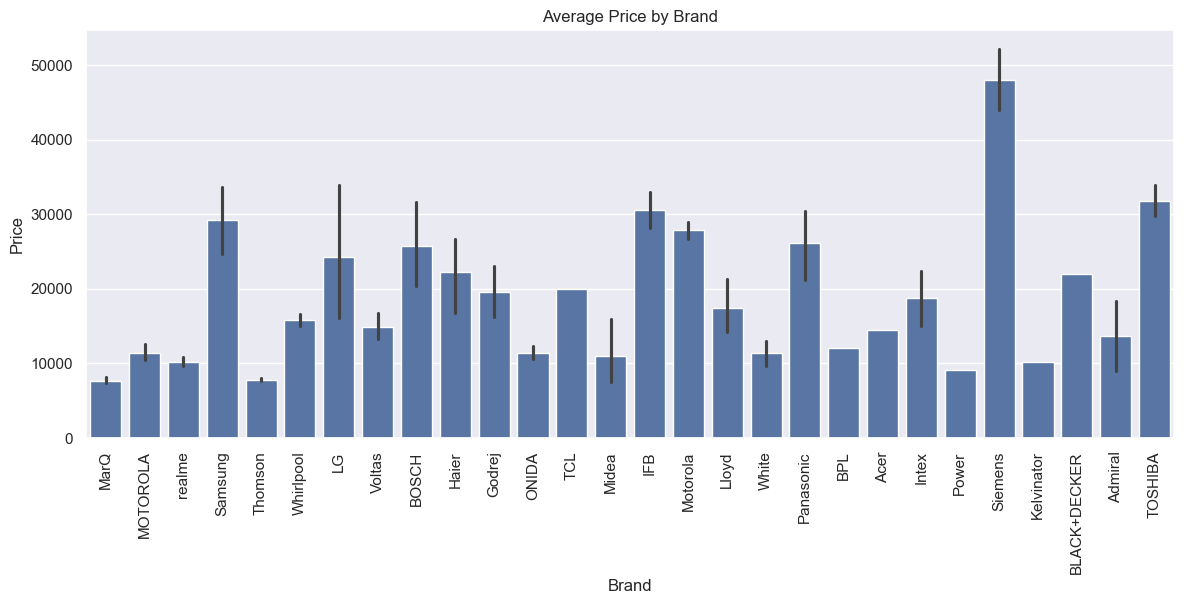

In [81]:
plt.figure(figsize=(12,6))

sns.barplot(x='Brand', y='Price', data=df)

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Average Price by Brand")
plt.show()

**Insights**
- The chart compares Brand (category) and Price (number).
- Siemens, IFB, and TOSHIBA have the highest prices. They are premium brands.
- Samsung, LG, Bosch, and Haier have medium prices. They are mid-range brands.
- MarQ, Onida, and Midea have lower prices. They are budget brands.
- Some brands like LG and Samsung have big price differences, meaning they sell both cheap and costly models.

### Numerical and Numerical
- First, let’s explore the plots when both the variable is numerical.




###  Scatter Plot
- Scatterplot uses dots to represent the relationship between two numeric variables.

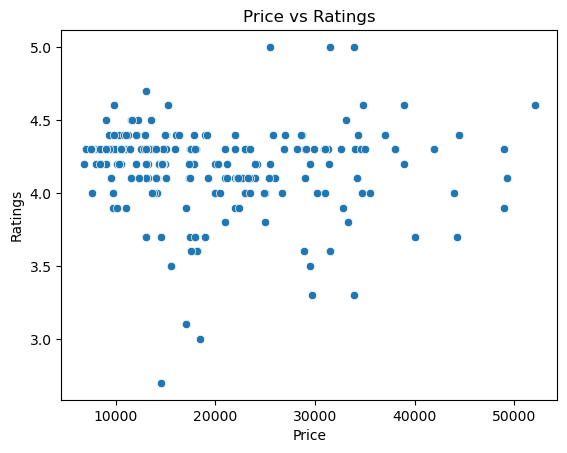

In [39]:
sns.scatterplot(x="Price", y="Ratings", data=df)
plt.title("Price vs Ratings")
plt.show()

**Insights**

- The average price shows the typical cost of washing machines in the market.
- The maximum and minimum prices highlight the price range from budget to premium machines.
- The highest rated product indicates the most preferred brand/model by customers.
- The most expensive product represents premium options with likely higher capacity or advanced features.

In [41]:
df[["Price", "Ratings"]].corr()

,Price,Ratings
Price,1.000000,-0.131166
Ratings,-0.131166,1.000000


**Insights**
- There is a weak positive correlation (0.35) between price and ratings.
- Higher-priced machines tend to have slightly higher ratings.
- However, the relationship is not strong, so price does not strongly affect ratings

### Multivariate Analysis
- When we analyze more than two variables together, we refer to it as Multivariate Analysis. 

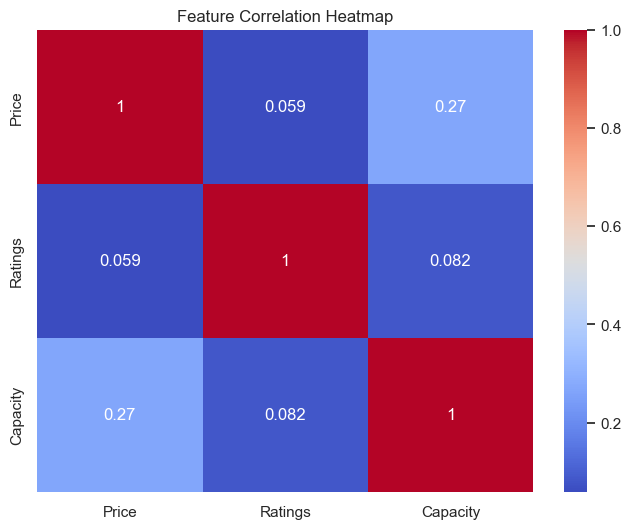

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Price","Ratings","Capacity"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
df.columns

Index(['Brand', 'Model', 'Price', 'Ratings', 'Capacity', 'Machine_Type',
       'Load_Type', 'Warranty(Years)'],
      dtype='object')